In [1]:
from sklearn.model_selection import train_test_split # Biblioteca para separação de amostras para treino e teste, curva de aprendizagem do treinamento e para processar a validação cruzada
from sklearn.neural_network import MLPRegressor # Biblioteca para utilização do Regressor MLP
from sklearn.preprocessing import StandardScaler, MinMaxScaler # Biblioteca utilizada para normalização dos dados
from sklearn.pipeline import Pipeline # Biblioteca para organização de ações em sequência
from sklearn import metrics # Biblioteca para avaliação das métricas no modelo
import matplotlib.pyplot as plt # Para visualizacao dos dados por meio de gráfico
import numpy as np # Biblioteca de manipulação de arrays Numpy
import pandas as pd # Biblioteca para manipulação de dados, aqui especificamente para importação e manipulação inicial do dataset
import seaborn as sns # Seaborn é uma biblioteca de visualização de dados Python baseada em matplotlib.

In [2]:
# Instancia do dataframe de treinamento + separação dos dados de entrada e saída
df = pd.read_csv('ressonanciaMLP.csv')

Xtrain = df.drop('d', axis=1)
Ytrain = df['d']

In [3]:
# Instancia do dataframe de teste + separação dos dados de entrada e saída
df_test = pd.read_csv('ressonanciaMLPTest.csv')

Xtest = df_test.drop('d', axis=1)
Ytest = df_test['d']

In [4]:
# Criação e configuração da instância do algoritmo MLPRegressor
# criação dos pipelines

# Tanh pipeline
pip_n5_tanh = Pipeline([('scaler', StandardScaler()),
                    ('MLPR', MLPRegressor(solver='adam', activation='tanh',
                                          hidden_layer_sizes=(5), max_iter=1000, learning_rate_init=0.01, random_state=42))
                   ])

pip_n10_tanh = Pipeline([('scaler', StandardScaler()),
                    ('MLPR', MLPRegressor(solver='adam', activation='tanh',
                                          hidden_layer_sizes=(10), max_iter=1000, learning_rate_init=0.01, random_state=42))
                   ])

pip_n15_tanh = Pipeline([('scaler', StandardScaler()),
                    ('MLPR', MLPRegressor(solver='adam', activation='tanh',
                                          hidden_layer_sizes=(15), max_iter=1000, learning_rate_init=0.01, random_state=42))
                   ])

# Relu pipeline
pip_n5_relu = Pipeline([('scaler', StandardScaler()),
                       ('MLPR', MLPRegressor(solver='adam', activation='relu',
                       hidden_layer_sizes=(5), max_iter=1000, learning_rate_init=0.01, random_state=42))
                      ])

pip_n10_relu = Pipeline([('scaler', StandardScaler()),
                       ('MLPR', MLPRegressor(solver='adam', activation='relu',
                       hidden_layer_sizes=(10), max_iter=1000, learning_rate_init=0.01, random_state=42))
                      ])

pip_n15_relu = Pipeline([('scaler', StandardScaler()),
                       ('MLPR', MLPRegressor(solver='adam', activation='relu',
                       hidden_layer_sizes=(15), max_iter=1000, learning_rate_init=0.01, random_state=42))
                      ])

# Logistic pipeline
pip_n5_logistic = Pipeline([('scaler', StandardScaler()),
                       ('MLPR', MLPRegressor(solver='adam', activation='logistic',
                       hidden_layer_sizes=(5), max_iter=1000, learning_rate_init=0.01, random_state=42))
                      ])

pip_n10_logistic = Pipeline([('scaler', StandardScaler()),
                       ('MLPR', MLPRegressor(solver='adam', activation='logistic',
                       hidden_layer_sizes=(10), max_iter=1000, learning_rate_init=0.01, random_state=42))
                      ])

pip_n15_logistic = Pipeline([('scaler', StandardScaler()),
                       ('MLPR', MLPRegressor(solver='adam', activation='logistic',
                       hidden_layer_sizes=(15), max_iter=1000, learning_rate_init=0.01, random_state=42))
                      ])

In [5]:
# Executa todos os pipelines
pipelines = [
    pip_n5_tanh,
    pip_n10_tanh,
    pip_n15_tanh,
    pip_n5_relu,
    pip_n10_relu,
    pip_n15_relu,
    pip_n5_logistic,
    pip_n10_logistic,
    pip_n15_logistic,
]

for pipeline in pipelines:
    pipeline.fit(Xtrain, Ytrain)

In [6]:
# Apresenta o número total de épocas e final loss de cada pipeline
for i, pipeline in enumerate(pipelines):
  final_loss = pipeline['MLPR'].loss_curve_[-1]
  epochs = pipeline['MLPR'].n_iter_
  print(f"Pipeline {i+1}: Final Loss = {final_loss:.4f}, Epochs = {epochs}")

Pipeline 1: Final Loss = 0.0047, Epochs = 61
Pipeline 2: Final Loss = 0.0138, Epochs = 21
Pipeline 3: Final Loss = 0.0102, Epochs = 18
Pipeline 4: Final Loss = 0.0036, Epochs = 87
Pipeline 5: Final Loss = 0.0005, Epochs = 42
Pipeline 6: Final Loss = 0.0020, Epochs = 58
Pipeline 7: Final Loss = 0.0021, Epochs = 96
Pipeline 8: Final Loss = 0.0105, Epochs = 22
Pipeline 9: Final Loss = 0.0021, Epochs = 33


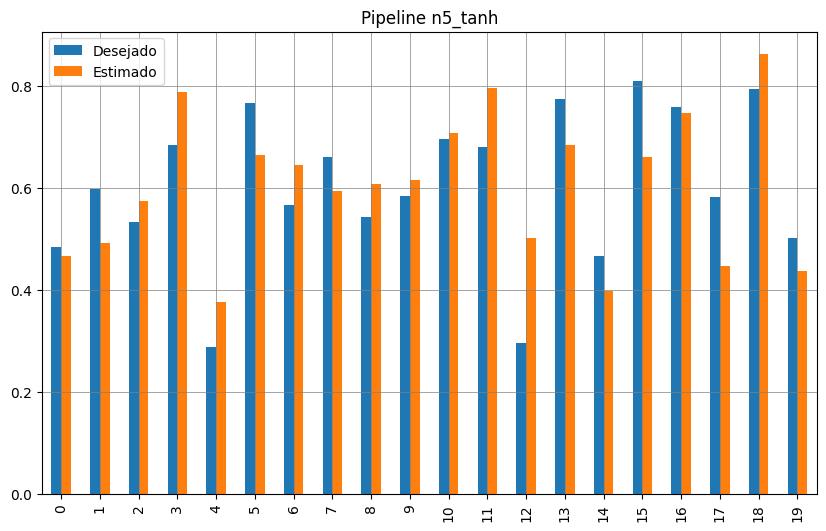

___________________________________________________________________________




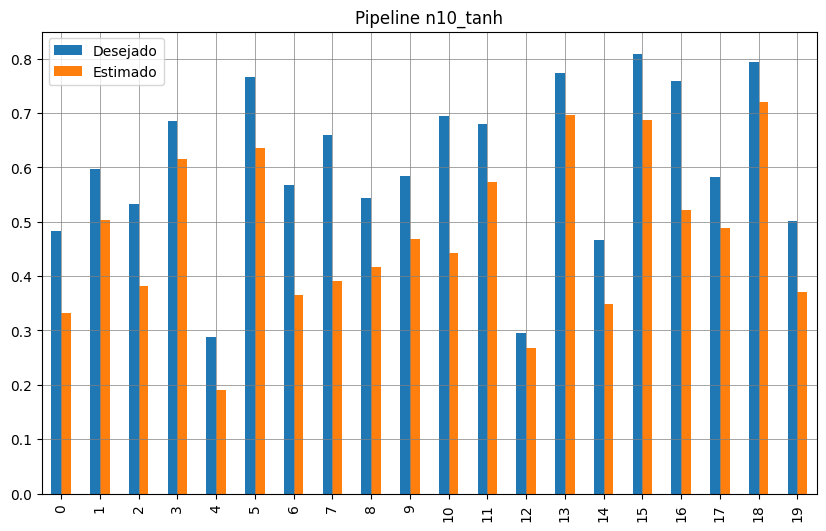

___________________________________________________________________________




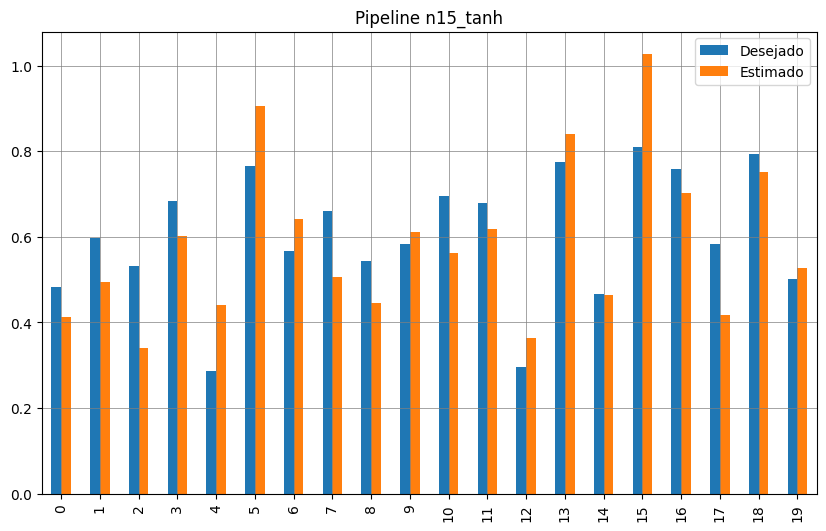

___________________________________________________________________________




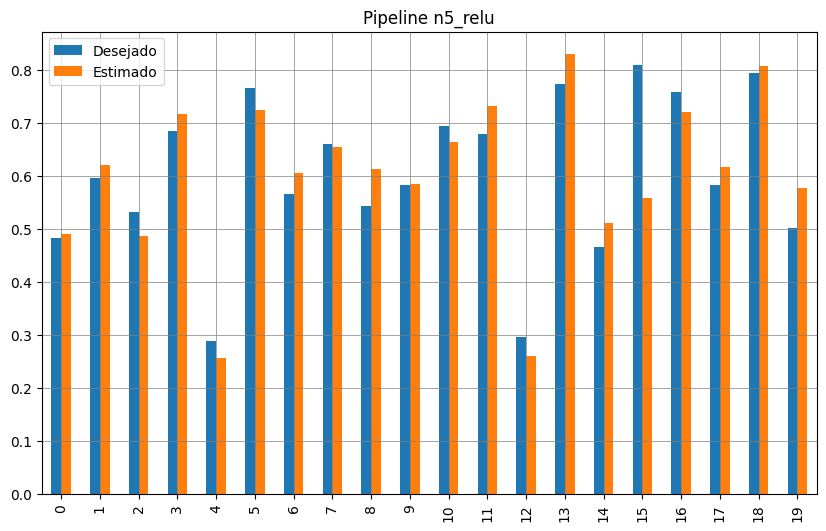

___________________________________________________________________________




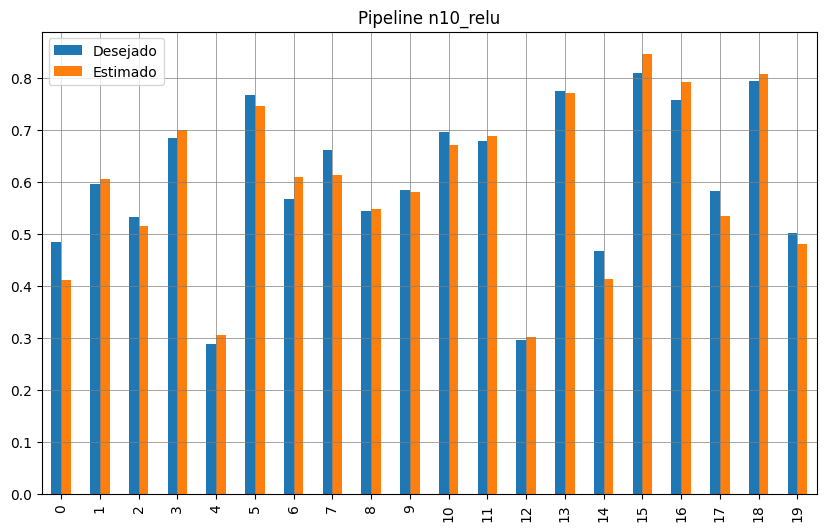

___________________________________________________________________________




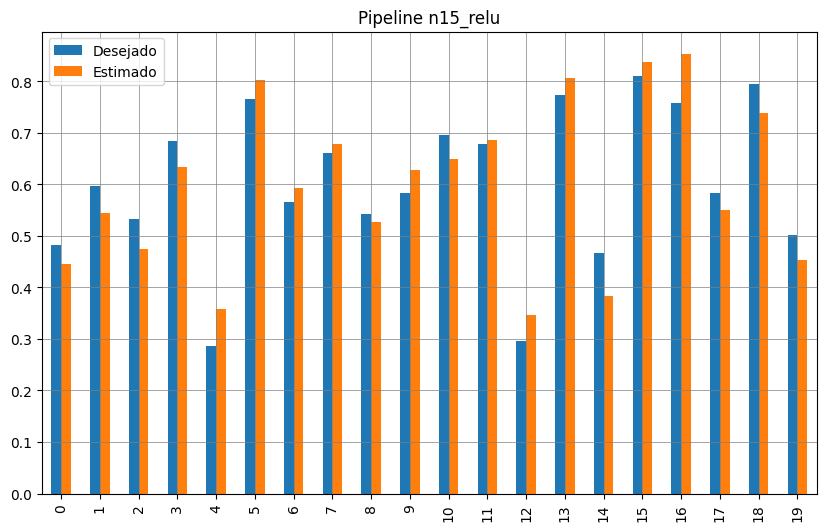

___________________________________________________________________________




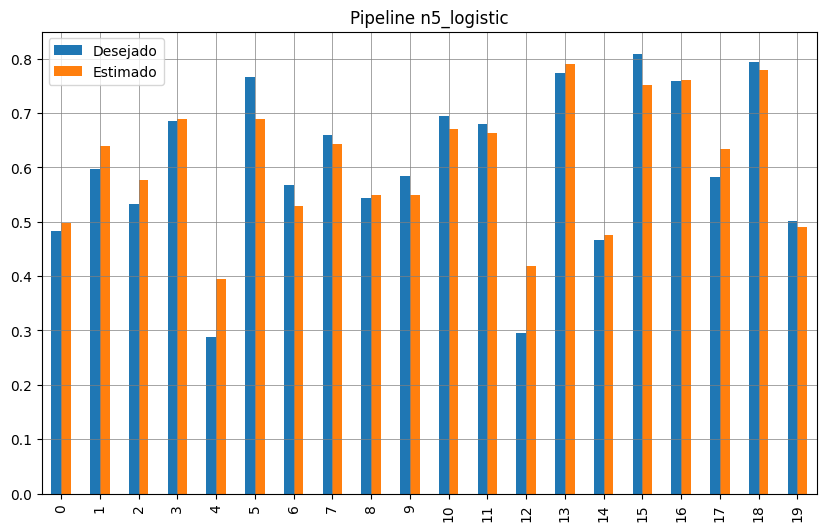

___________________________________________________________________________




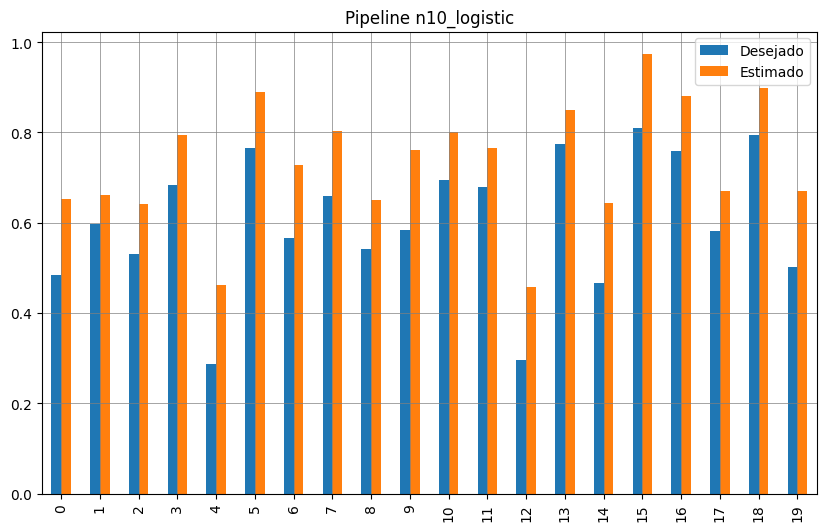

___________________________________________________________________________




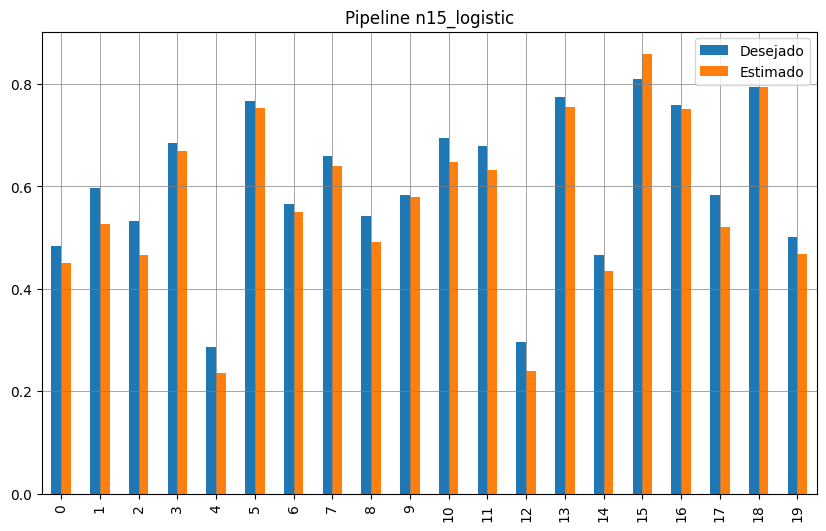

___________________________________________________________________________




In [7]:
# Plota o gráfico de predições desejadas e estimadas
def plot_predictions(pipeline, X, Y, title, head_count=40):
    y_pred = pipeline.predict(X)
    df_temp = pd.DataFrame({'Desejado': Y, 'Estimado': y_pred})
    df_temp = df_temp.head(head_count)
    df_temp.plot(kind='bar', figsize=(10, 6), title=title)
    plt.grid(which='major', linestyle='-', linewidth='0.5', color='gray')
    plt.grid(which='minor', linestyle=':', linewidth='0.5', color='blue')
    plt.show()
    print('_'*75)
    print('\n')

# Apresenta o gráfico de predições desejadas e estimadas para cada pipeline
plot_predictions(pip_n5_tanh, Xtest, Ytest, "Pipeline n5_tanh")
plot_predictions(pip_n10_tanh, Xtest, Ytest, "Pipeline n10_tanh")
plot_predictions(pip_n15_tanh, Xtest, Ytest, "Pipeline n15_tanh")
plot_predictions(pip_n5_relu, Xtest, Ytest, "Pipeline n5_relu")
plot_predictions(pip_n10_relu, Xtest, Ytest, "Pipeline n10_relu")
plot_predictions(pip_n15_relu, Xtest, Ytest, "Pipeline n15_relu")
plot_predictions(pip_n5_logistic, Xtest, Ytest, "Pipeline n5_logistic")
plot_predictions(pip_n10_logistic, Xtest, Ytest, "Pipeline n10_logistic")
plot_predictions(pip_n15_logistic, Xtest, Ytest, "Pipeline n15_logistic")

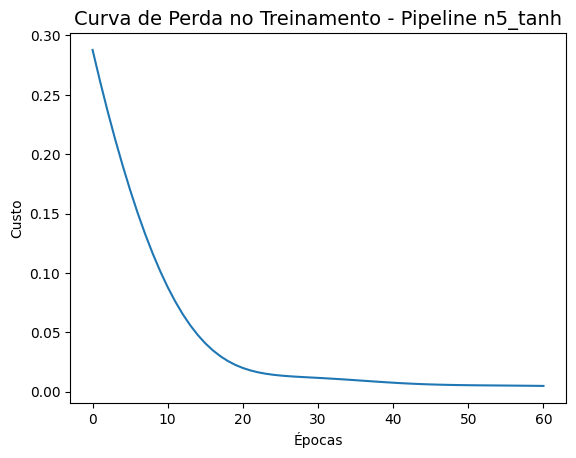

___________________________________________________________________________




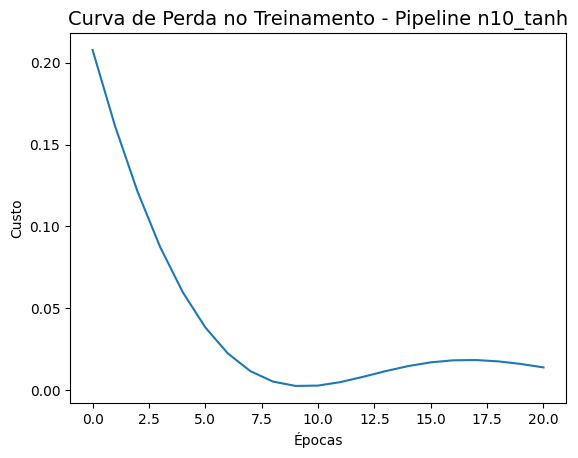

___________________________________________________________________________




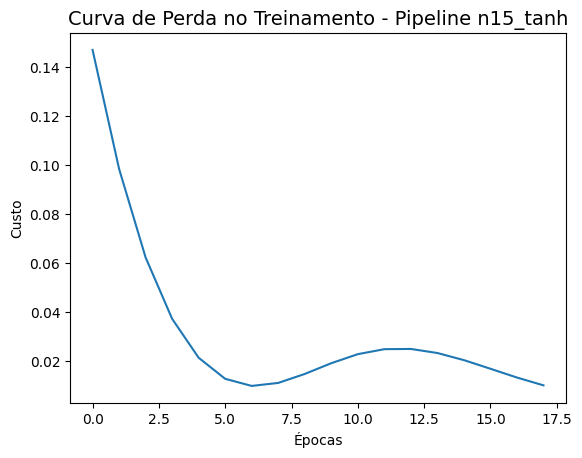

___________________________________________________________________________




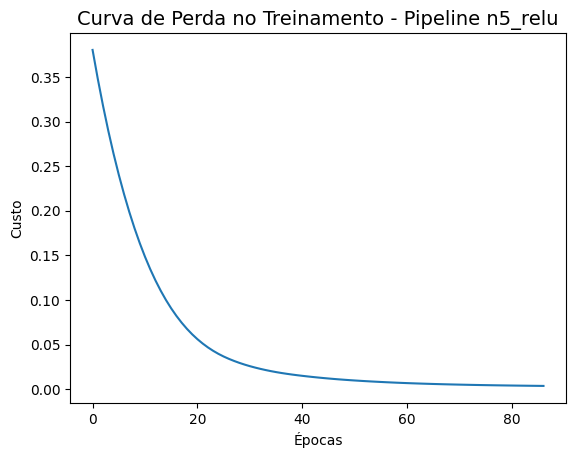

___________________________________________________________________________




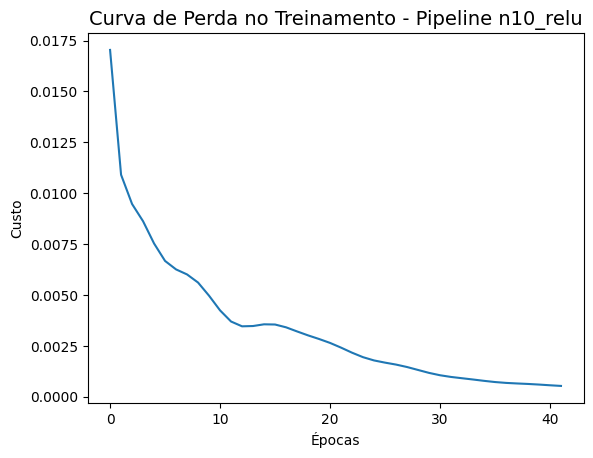

___________________________________________________________________________




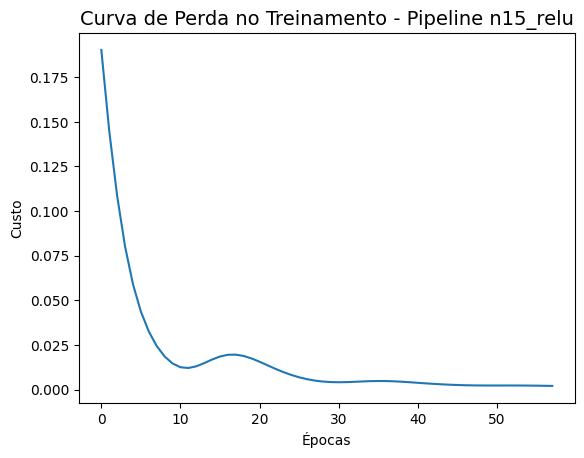

___________________________________________________________________________




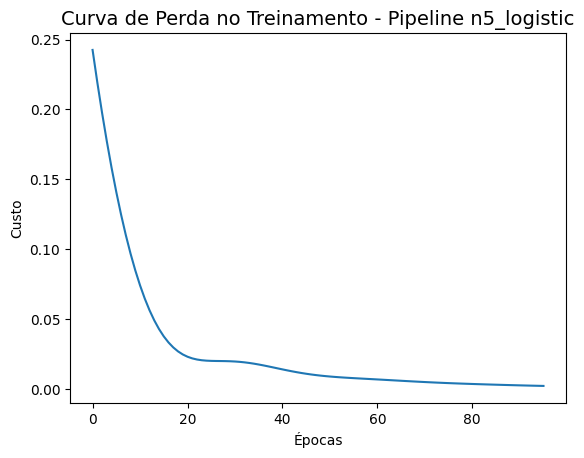

___________________________________________________________________________




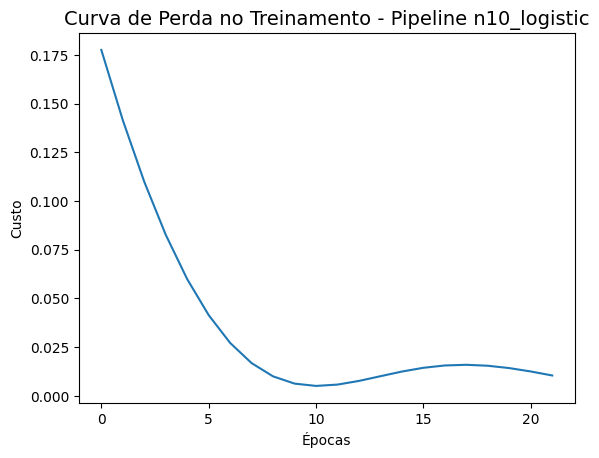

___________________________________________________________________________




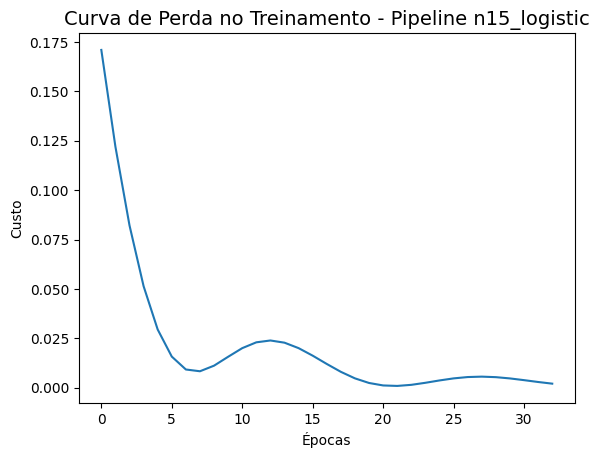

___________________________________________________________________________




In [8]:
# Função para plotar o gráfico de curva de perda
def plot_loss_curve(pipeline, title):
  plt.plot(pipeline['MLPR'].loss_curve_)
  plt.title(f"Curva de Perda no Treinamento - {title}", fontsize=14)
  plt.xlabel('Épocas')
  plt.ylabel('Custo')
  plt.show()
  print('_'*75)
  print('\n')

# Apresenta o gráfico para cada pipeline executada
plot_loss_curve(pip_n5_tanh, "Pipeline n5_tanh")
plot_loss_curve(pip_n10_tanh, "Pipeline n10_tanh")
plot_loss_curve(pip_n15_tanh, "Pipeline n15_tanh")
plot_loss_curve(pip_n5_relu, "Pipeline n5_relu")
plot_loss_curve(pip_n10_relu, "Pipeline n10_relu")
plot_loss_curve(pip_n15_relu, "Pipeline n15_relu")
plot_loss_curve(pip_n5_logistic, "Pipeline n5_logistic")
plot_loss_curve(pip_n10_logistic, "Pipeline n10_logistic")
plot_loss_curve(pip_n15_logistic, "Pipeline n15_logistic")

In [9]:
# Avalia as métricas para cada pipeline executado
for i, pipeline in enumerate(pipelines):
  y_pred = pipeline.predict(Xtest)
  print(f"\n--- Métricas para o pipeline {i+1} ---")
  print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(Ytest, y_pred))
  print('Mean Squared Error (MSE):', metrics.mean_squared_error(Ytest, y_pred))
  print('Root Mean Squared Error (RMSE):', metrics.root_mean_squared_error(Ytest, y_pred))
  print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(Ytest, y_pred))
  print('R2: ', metrics.r2_score(Ytest, y_pred))


--- Métricas para o pipeline 1 ---
Mean Absolute Error (MAE): 0.08115056648957557
Mean Squared Error (MSE): 0.008821292899859971
Root Mean Squared Error (RMSE): 0.09392173816460155
Mean Absolute Percentage Error (MAPE): 0.15464415611663276
R2:  0.5912752208611254

--- Métricas para o pipeline 2 ---
Mean Absolute Error (MAE): 0.13210311344151696
Mean Squared Error (MSE): 0.021258039573776914
Root Mean Squared Error (RMSE): 0.14580137027400297
Mean Absolute Percentage Error (MAPE): 0.2248946544046015
R2:  0.015032418903656586

--- Métricas para o pipeline 3 ---
Mean Absolute Error (MAE): 0.09660950058885637
Mean Squared Error (MSE): 0.012611511036057819
Root Mean Squared Error (RMSE): 0.11230098412773513
Mean Absolute Percentage Error (MAPE): 0.17195993096516424
R2:  0.4156596860192642

--- Métricas para o pipeline 4 ---
Mean Absolute Error (MAE): 0.046482626145733646
Mean Squared Error (MSE): 0.0047208043436002605
Root Mean Squared Error (RMSE): 0.06870810973677169
Mean Absolute Percen